In [41]:
import numpy as np
from tqdm import tqdm
import random
from scipy.special import expit
import os
from scipy import stats

Características de los sujetos: *menor de edad*

Características de los delitos: *violencia*

Tipos de crímen: *encerrona, asalto*

Sobre los betas, propensión de cada sujeto a cometer crímenes
Menor de edad tiene mayor prob. de cometer delitos con violencia.

$P(X) = \frac{1}{Z}\exp{\sum_i{x_i(\gamma w_i + \beta_i z)} + \sum_{i,j}{x_i x_j \theta (w_i + w_j)}}$

In [43]:
betas_mayores = stats.norm(loc=-2, scale=0.5).rvs(size = 10)
betas_menores = stats.norm(loc=2, scale=0.5).rvs(size = 10)

In [44]:
sujetos = {1:{"menor":1},2:{"menor":1},
           3:{"menor":1},4:{"menor":1},
           5:{"menor":1},6:{"menor":1},
           7:{"menor":1},8:{"menor":1},
           9:{"menor":1},10:{"menor":1},
           11:{"menor":0},12:{"menor":0},
           13:{"menor":0},14:{"menor":0},
           15:{"menor":0},16:{"menor":0},
           17:{"menor":0},18:{"menor":0},
           19:{"menor":0},20:{"menor":0}}

gamma = 0.5
betas = np.concat([betas_menores, betas_mayores])
theta = -1

In [45]:
delitos = [1]*20 + [0]*20

delitos_grupos = []
for z_j in tqdm(delitos):

   # Definimos el grupo inicial
   group = []
   for s in sujetos:
      if random.random() > 0.5:
         group.append(1)
      else:
         group.append(0)   
   group = np.array(group)

   N_iter = 10000

   samples = []

   i_index = list(sujetos.keys())
   I = len(sujetos)

   for n in range(N_iter):

      i_order = random.sample(i_index, I)

      for s in i_order:
         change_flag = False
         w_i = np.array(list(sujetos[s].values()))

         node_propension = np.dot(w_i, gamma)
         link_preference = np.dot(z_j, betas[s-1])
         F_j = ((theta * (np.array([i["menor"] for i in sujetos.values()]) + w_i) ) )
         F_j[s-1] = 0
         q = F_j * group
         group_preference = np.dot(q,np.ones(len(q)))
         util = node_propension + link_preference + group_preference
         p = expit(util)
         
         if (random.random() <= p):
            group[s-1] = 1
         else:
            group[s-1] = 0

      # Terminamos la iteración por los sujetos de la red
      if (n > 1000) & (n%10 == 0):
         samples.append(group.copy())
   delitos_grupos.append(random.sample(samples, 1)[0].copy().tolist())
      

100%|██████████| 40/40 [02:28<00:00,  3.72s/it]


In [46]:
print(len(samples))
print(delitos_grupos)

899
[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0,

In [ ]:
import cmdstanpy
#cmdstanpy.install_cmdstan(compiler=True)

In [48]:
y = delitos_grupos                              # Vectores de incidencia
w = [i["menor"] for i in sujetos.values()]      # Vector de atributos de los nodos
N = len(w)                                      # Cantidad de nodos
z = delitos                                     # Atributos de los delitos
M = len(z)                                      # Cantidad de delitos
cmdstanpy.write_stan_json("stan_models/data_rmf-pseudo1.json", {"y":y, "N":N, "w":w, "M":M, "z":z})

In [49]:
stan_model = cmdstanpy.CmdStanModel(stan_file=os.path.join("stan_models",'rmf-pseudo1.stan'), #force_compile=True
                                    )

fit = stan_model.sample(
    data="stan_models/data_rmf-pseudo1.json",
    chains=4,
    iter_sampling=4000,
    iter_warmup=1000, 
    seed=12345, #show_console=True
)

11:17:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:18:30 - cmdstanpy - INFO - CmdStan done processing.


In [50]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [51]:
print(gamma)
print(betas)
print(theta)

0.5
[ 1.97780377  1.4736903   2.17401336  2.32022236  2.01051184  3.06996457
  1.9654983   1.43443344  1.75666771  2.67300497 -2.99260534 -2.59833982
 -2.28036307 -1.63447677 -2.27023846 -2.68005047 -1.58511242 -2.61057539
 -2.37213579 -2.22783283]
-1


In [52]:
import pandas as pd
pd.set_option('display.max_rows', 500)
display(fit.summary())

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-237.611000,0.041223,3.380450,3.301750,-243.673000,-237.303000,-232.643000,6820.84,10389.10,1.00104
gamma,1.732750,0.007502,0.652070,0.646510,0.658213,1.728320,2.799770,7573.12,9412.22,1.00046
beta[1],2.579430,0.009076,0.890659,0.870768,1.058540,2.610090,3.986560,9757.96,10038.70,1.00032
beta[2],2.107230,0.008908,0.926124,0.929094,0.560777,2.120030,3.605450,10872.80,11071.60,1.00054
beta[3],1.240320,0.010462,1.222540,1.210600,-0.873251,1.293930,3.138750,13976.40,10961.60,1.00052
beta[4],3.950320,0.008400,0.741050,0.738498,2.755110,3.936290,5.187290,7805.51,10545.70,1.00028
beta[5],1.924210,0.009592,1.022100,1.005350,0.157496,1.977360,3.520610,11643.60,10002.30,1.00114
beta[6],4.234220,0.007923,0.717762,0.719528,3.067280,4.227200,5.429040,8227.33,10659.50,1.00057
beta[7],3.478020,0.008481,0.774868,0.765859,2.205040,3.477340,4.745510,8363.10,10352.30,1.00061
beta[8],1.706660,0.009420,1.035900,1.013480,-0.056507,1.754160,3.332030,12325.50,11183.00,1.00021


<Axes: ylabel='Count'>

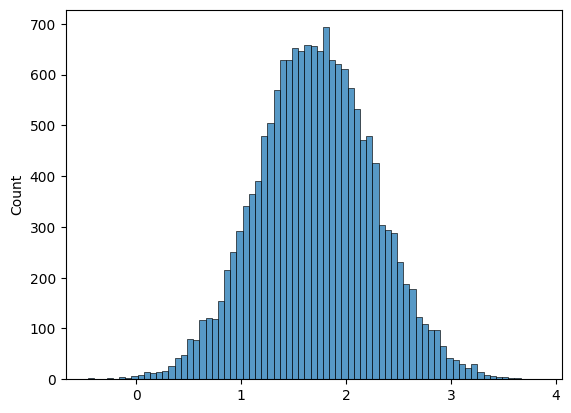

In [13]:
import seaborn as sns
sns.histplot(fit.gamma)